In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Reading File
df = pd.read_csv('/DataSets/application_train.csv',encoding='latin1')
pd.set_option('display.max_columns', 150)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [6]:
# statistical Property of numerical columns
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [7]:
# statistical Property of Object columns
df.describe(include=[object])

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


In [8]:
df.shape

(307511, 121)

## Data Preprocessing

In [9]:
pd.set_option('display.max_rows', 150)

In [10]:
# Initial column count
initial_columns_count = df.shape[1]
initial_columns_count

121

In [11]:
# Checking null values and their percentage
def check_null_values(df):
    null_counts = df.isnull().sum()
    null_percentages = (null_counts / len(df)) * 100

    null_stats = pd.DataFrame({
        'Column Name': null_counts.index,
        'Null Count': null_counts.values,
        'Null Percentage': null_percentages.values
    })

    # Filterd out columns with no null values
    null_stats = null_stats[null_stats['Null Count'] > 0]

    # Sorting by null count in descending order
    null_stats = null_stats.sort_values(by='Null Count', ascending=False)
    null_stats.reset_index(drop=True, inplace=True)

    return null_stats

In [12]:
check_null_values(df)

,Column Name,Null Count,Null Percentage
0,COMMONAREA_MEDI,214865,69.872297
1,COMMONAREA_AVG,214865,69.872297
2,COMMONAREA_MODE,214865,69.872297
3,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
4,NONLIVINGAPARTMENTS_MODE,213514,69.432963
5,NONLIVINGAPARTMENTS_AVG,213514,69.432963
6,FONDKAPREMONT_MODE,210295,68.386172
7,LIVINGAPARTMENTS_MODE,210199,68.354953
8,LIVINGAPARTMENTS_MEDI,210199,68.354953
9,LIVINGAPARTMENTS_AVG,210199,68.354953


In [13]:
def drop_columns_with_high_null_percentage(df, threshold=40):

    # Calculating null percentages for each column
    null_percentages = (df.isnull().mean() * 100)

    columns_to_drop = null_percentages[null_percentages > threshold].index

    # Droping columns with high null percentages
    df = df.drop(columns=columns_to_drop)

    return df

df = drop_columns_with_high_null_percentage(df)

In [14]:
# Checking null values and their percentage after dropping almost empty columns
check_null_values(df)

,Column Name,Null Count,Null Percentage
0,OCCUPATION_TYPE,96391,31.345545
1,EXT_SOURCE_3,60965,19.825307
2,AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631
3,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631
4,AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
5,AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
6,AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
7,AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.501631
8,NAME_TYPE_SUITE,1292,0.420148
9,DEF_60_CNT_SOCIAL_CIRCLE,1021,0.332021


In [15]:
# Columns count after dropping
columns_count_after_dropping = df.shape[1]
columns_count_after_dropping

72

In [16]:
# Filling Null Value Of Numerical Column with mean
def fill_na_with_mean(df, columns):
    for column in columns:
        mean_value = df[column].mean()
        df[column] = df[column].fillna(mean_value)

columns_to_fill = [
    'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
    'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_ANNUITY',
    'AMT_GOODS_PRICE', 'DAYS_LAST_PHONE_CHANGE'
]

fill_na_with_mean(df, columns_to_fill)

In [17]:
# Filling Null Value Of Object Column with mode
def fill_na_with_mode(df, columns):
    for column in columns:
        mode_value = df[column].mode()[0]
        df[column] = df[column].fillna(mode_value)

columns_to_fill = [
    'OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'OBS_30_CNT_SOCIAL_CIRCLE',
    'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
    'CNT_FAM_MEMBERS'
]

fill_na_with_mode(df, columns_to_fill)

In [18]:
# Checking null values after filling with mean and mode
check_null_values(df)

,Column Name,Null Count,Null Percentage


In [19]:
# Droping Unneccessary Columns
df.drop(columns=['SK_ID_CURR'], inplace=True)

In [20]:
# applying absolute method to handle Negative values
columns = ['DAYS_BIRTH',	'DAYS_EMPLOYED',	'DAYS_REGISTRATION',	'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']
df[columns] = df[columns].abs()

In [21]:
# checking duplicates
df.duplicated().sum()

0

In [22]:
# Final column count
Final_columns_count = df.shape[1]
Final_columns_count

71

In [23]:
new_column_names = [
    'Target', 'Contract_Type','Owns_Car', 'Owns_Realty', 'Children_Count',
    'Total_Income', 'Credit_Amount', 'Annuity_Amount', 'Goods_Price', 'Companion_Type',
    'Income_Type', 'Education_Level', 'Family_Status', 'Housing_Type', 'Region_Population',
    'Birth_Days', 'Employed_Days', 'Registration_Days', 'ID_Publish_Days', 'Mobile_Flag',
    'Work_Phone_Flag', 'Home_Phone_Flag', 'Mobile_Contact_Flag', 'Phone_Flag',
    'Email_Flag', 'Job_Type', 'Family_Size', 'Region_Rating',
    'City_Region_Rating', 'Application_Day', 'Application_Hour',
    'Reg_Region_Not_Live_Region', 'Reg_Region_Not_Work_Region', 'Live_Region_Not_Work_Region',
    'Reg_City_Not_Live_City', 'Reg_City_Not_Work_City', 'Live_City_Not_Work_City',
    'Organization_Type', 'External_Source_2', 'External_Source_3', 'Social_30_Observations',
    'Social_30_Defaults', 'Social_60_Observations', 'Social_60_Defaults',
    'Last_Phone_Change_Days', 'Document_Flag_2', 'Document_Flag_3', 'Document_Flag_4',
    'Document_Flag_5', 'Document_Flag_6', 'Document_Flag_7', 'Document_Flag_8',
    'Document_Flag_9', 'Document_Flag_10', 'Document_Flag_11', 'Document_Flag_12',
    'Document_Flag_13', 'Document_Flag_14', 'Document_Flag_15', 'Document_Flag_16',
    'Document_Flag_17', 'Document_Flag_18', 'Document_Flag_19', 'Document_Flag_20',
    'Document_Flag_21', 'Credit_Inquiries_Hour', 'Credit_Inquiries_Day',
    'Credit_Inquiries_Week', 'Credit_Inquiries_Month', 'Credit_Inquiries_Quarter',
    'Credit_Inquiries_Year'
]
# Assigning new column names
df.columns = new_column_names

In [24]:
df.head()

,Target,Contract_Type,Owns_Car,Owns_Realty,Children_Count,Total_Income,Credit_Amount,Annuity_Amount,Goods_Price,Companion_Type,Income_Type,Education_Level,Family_Status,Housing_Type,Region_Population,Birth_Days,Employed_Days,Registration_Days,ID_Publish_Days,Mobile_Flag,Work_Phone_Flag,Home_Phone_Flag,Mobile_Contact_Flag,Phone_Flag,Email_Flag,Job_Type,Family_Size,Region_Rating,City_Region_Rating,Application_Day,Application_Hour,Reg_Region_Not_Live_Region,Reg_Region_Not_Work_Region,Live_Region_Not_Work_Region,Reg_City_Not_Live_City,Reg_City_Not_Work_City,Live_City_Not_Work_City,Organization_Type,External_Source_2,External_Source_3,Social_30_Observations,Social_30_Defaults,Social_60_Observations,Social_60_Defaults,Last_Phone_Change_Days,Document_Flag_2,Document_Flag_3,Document_Flag_4,Document_Flag_5,Document_Flag_6,Document_Flag_7,Document_Flag_8,Document_Flag_9,Document_Flag_10,Document_Flag_11,Document_Flag_12,Document_Flag_13,Document_Flag_14,Document_Flag_15,Document_Flag_16,Document_Flag_17,Document_Flag_18,Document_Flag_19,Document_Flag_20,Document_Flag_21,Credit_Inquiries_Hour,Credit_Inquiries_Day,Credit_Inquiries_Week,Credit_Inquiries_Month,Credit_Inquiries_Quarter,Credit_Inquiries_Year
0,1,Cash loans,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
1,0,Cash loans,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
2,0,Revolving loans,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
3,0,Cash loans,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510853,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
4,0,Cash loans,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.510853,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000


## Data Analysis and Visualization

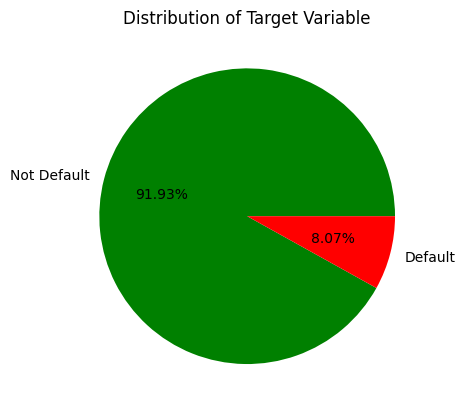

In [25]:
# Displaying the distribution of the target variable
target_mapping = {1: "Default", 0: "Not Default"}
target_names = df["Target"].map(target_mapping)
colors = ["green" if label == "Not Default" else "red" for label in target_names.value_counts().index]

# Pie chart
target_names.value_counts().plot(kind="pie", autopct='%.2f%%', colors=colors)
plt.ylabel("")
plt.title("Distribution of Target Variable")
plt.show()

In [26]:
# showing the relationship between a categorical column and the target column
def plot_and_print_category_analysis(df, target_column, categorical_column):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Heatmap
    cross_tab = pd.crosstab(df[categorical_column], df[target_column])
    sns.heatmap(cross_tab, annot=True, cmap='coolwarm', ax=axes[0], fmt="d")
    axes[0].set_title(f'Heatmap of {categorical_column} vs {target_column}')

    # Calculating defaulter ratios
    defaulter_ratio = df[df[target_column] == 1][categorical_column].value_counts() / df[categorical_column].value_counts() * 100
    ratio_df = defaulter_ratio.reset_index()
    ratio_df.columns = [categorical_column, 'Defaulter_Ratio']

    # Bar Plot with defaulter ratios
    sns.barplot(x=categorical_column, y='Defaulter_Ratio', data=ratio_df, ax=axes[1])
    axes[1].set_title(f'Defaulter Ratio in {categorical_column}')
    axes[1].set_ylabel('Defaulter Ratio (%)')
    axes[1].set_xlabel(categorical_column)
    axes[1].tick_params(axis='x', rotation=60, labelsize=12)
    axes[1].tick_params(axis='y', labelsize=12)

    # Displaying the bar plot with the defaulter ratio
    for p in axes[1].patches:
        height = p.get_height()
        axes[1].annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='center', fontsize=10, color='black',
                         xytext=(0, 5), textcoords='offset points')

    plt.tight_layout()
    plt.show()
    print(ratio_df)

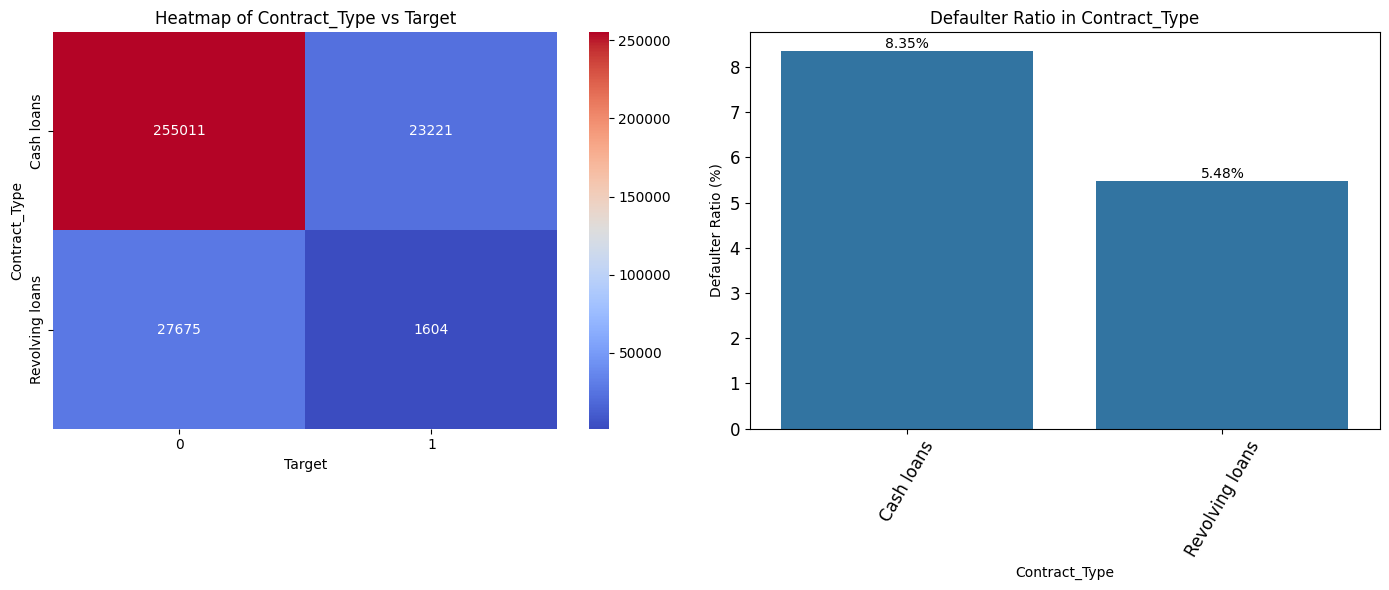

     Contract_Type  Defaulter_Ratio
0       Cash loans         8.345913
1  Revolving loans         5.478329


In [27]:
plot_and_print_category_analysis(df, 'Target', 'Contract_Type')

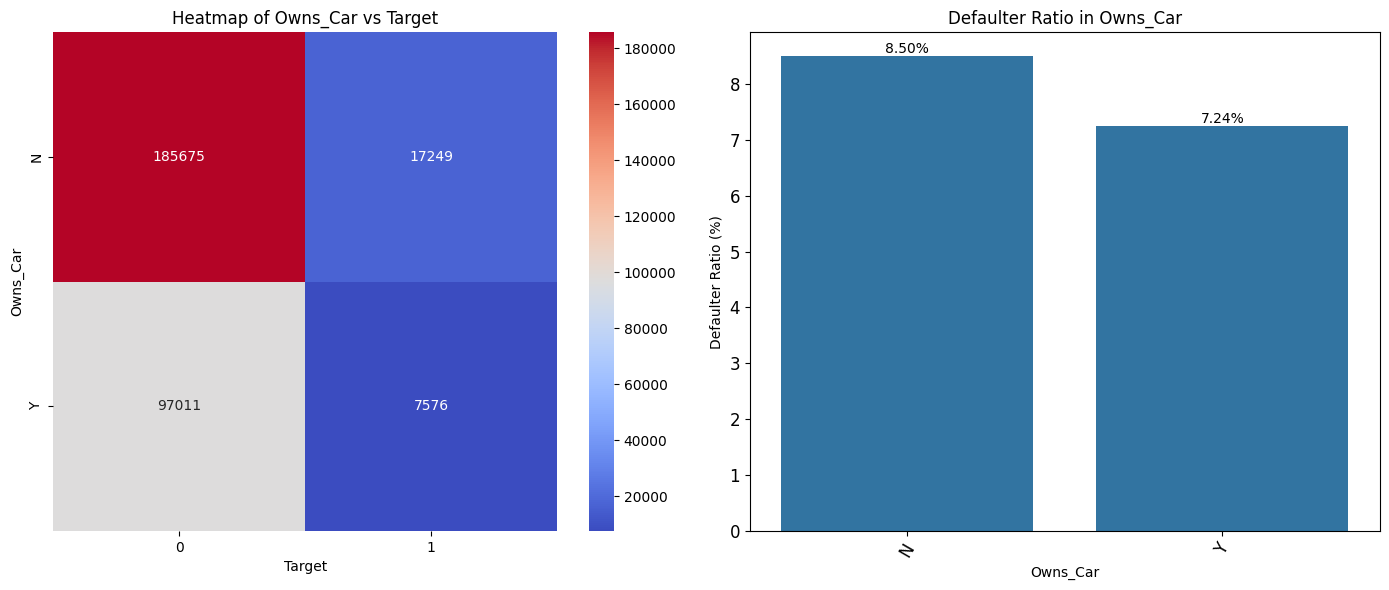

  Owns_Car  Defaulter_Ratio
0        N         8.500227
1        Y         7.243730


In [28]:
plot_and_print_category_analysis(df, 'Target', 'Owns_Car')

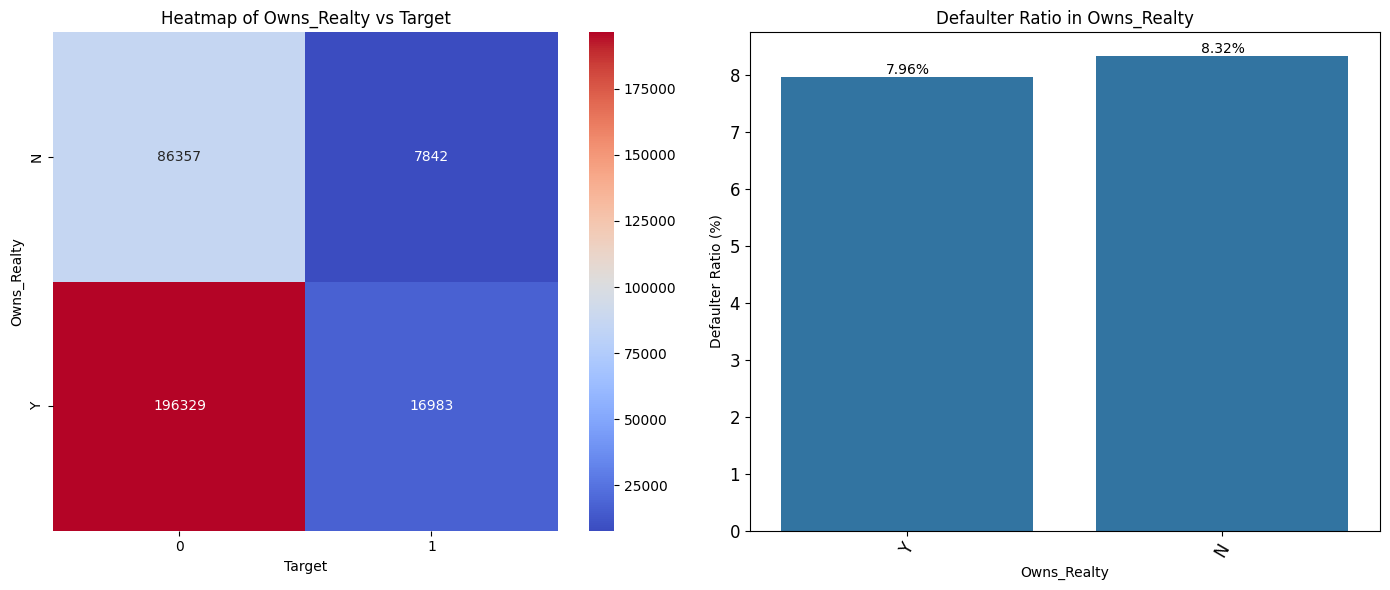

  Owns_Realty  Defaulter_Ratio
0           Y         7.961577
1           N         8.324929


In [29]:
plot_and_print_category_analysis(df, 'Target','Owns_Realty')

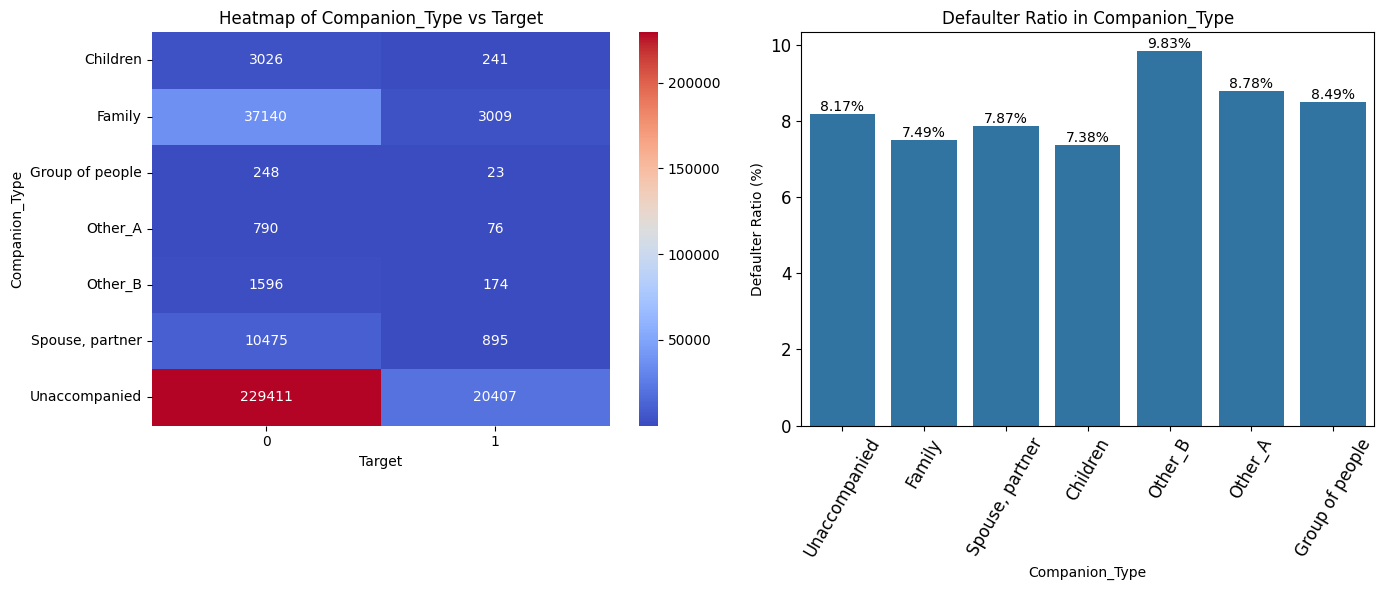

    Companion_Type  Defaulter_Ratio
0    Unaccompanied         8.168747
1           Family         7.494583
2  Spouse, partner         7.871592
3         Children         7.376798
4          Other_B         9.830508
5          Other_A         8.775982
6  Group of people         8.487085


In [30]:
plot_and_print_category_analysis(df, 'Target','Companion_Type')

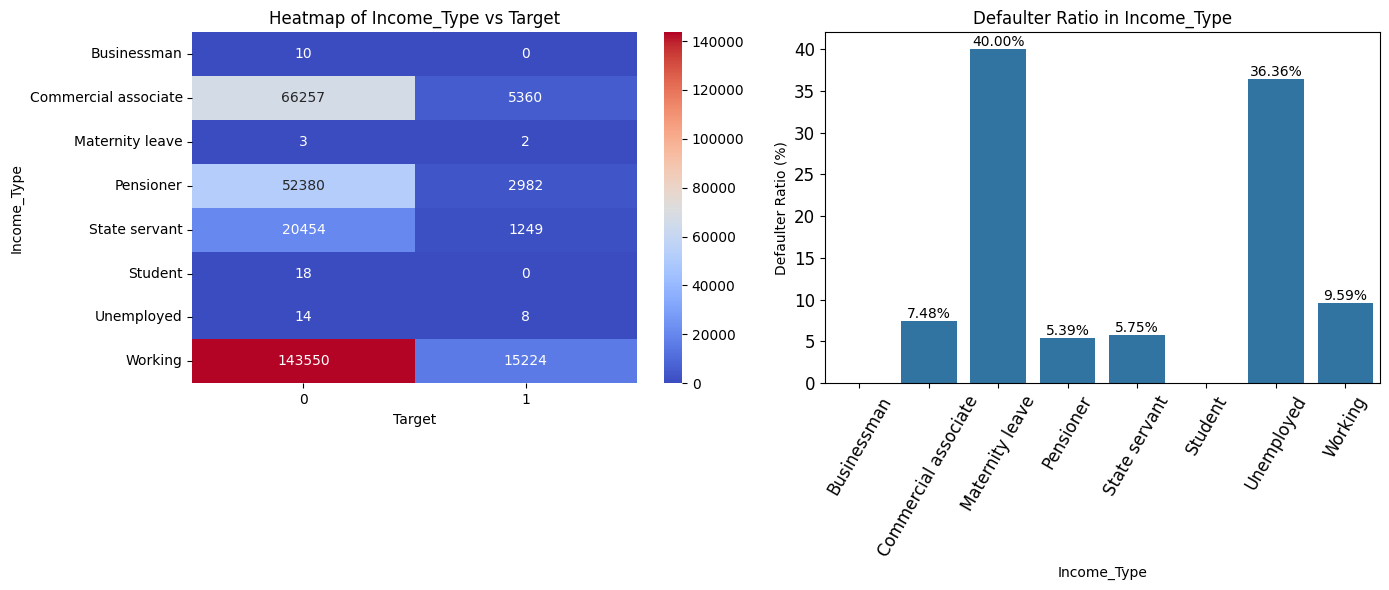

            Income_Type  Defaulter_Ratio
0           Businessman              NaN
1  Commercial associate         7.484257
2       Maternity leave        40.000000
3             Pensioner         5.386366
4         State servant         5.754965
5               Student              NaN
6            Unemployed        36.363636
7               Working         9.588472


In [31]:
plot_and_print_category_analysis(df, 'Target','Income_Type')

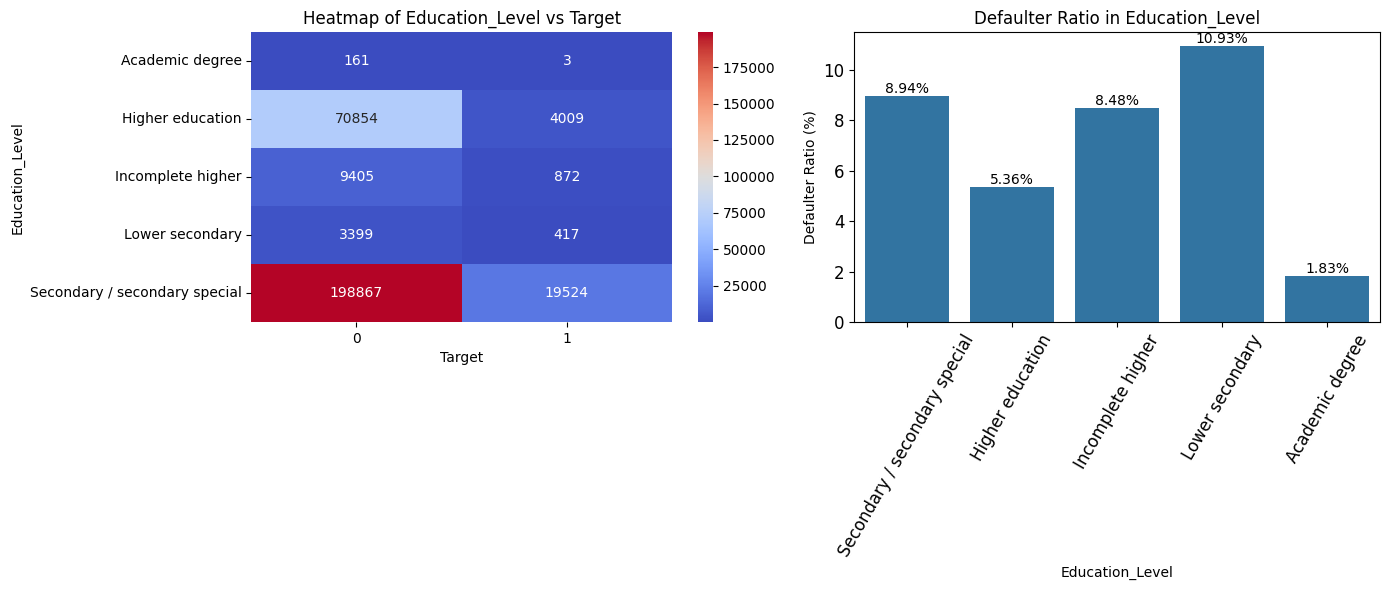

                 Education_Level  Defaulter_Ratio
0  Secondary / secondary special         8.939929
1               Higher education         5.355115
2              Incomplete higher         8.484966
3                Lower secondary        10.927673
4                Academic degree         1.829268


In [32]:
plot_and_print_category_analysis(df, 'Target','Education_Level')

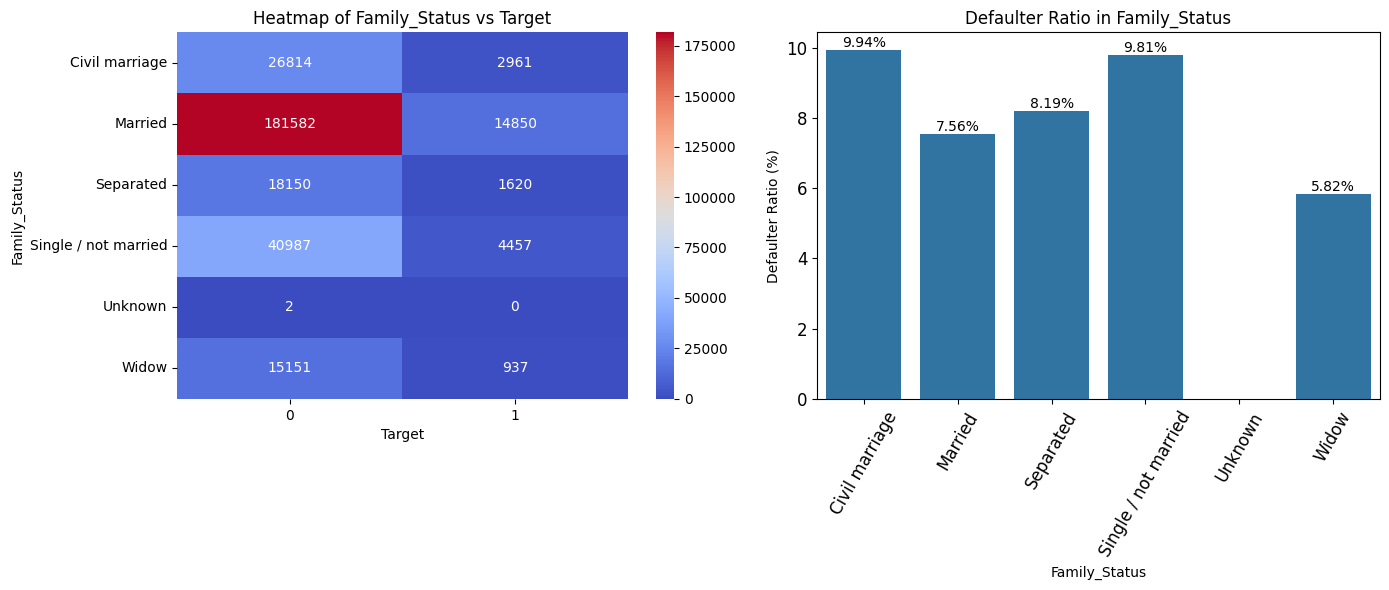

          Family_Status  Defaulter_Ratio
0        Civil marriage         9.944584
1               Married         7.559868
2             Separated         8.194234
3  Single / not married         9.807675
4               Unknown              NaN
5                 Widow         5.824217


In [33]:
plot_and_print_category_analysis(df, 'Target','Family_Status')

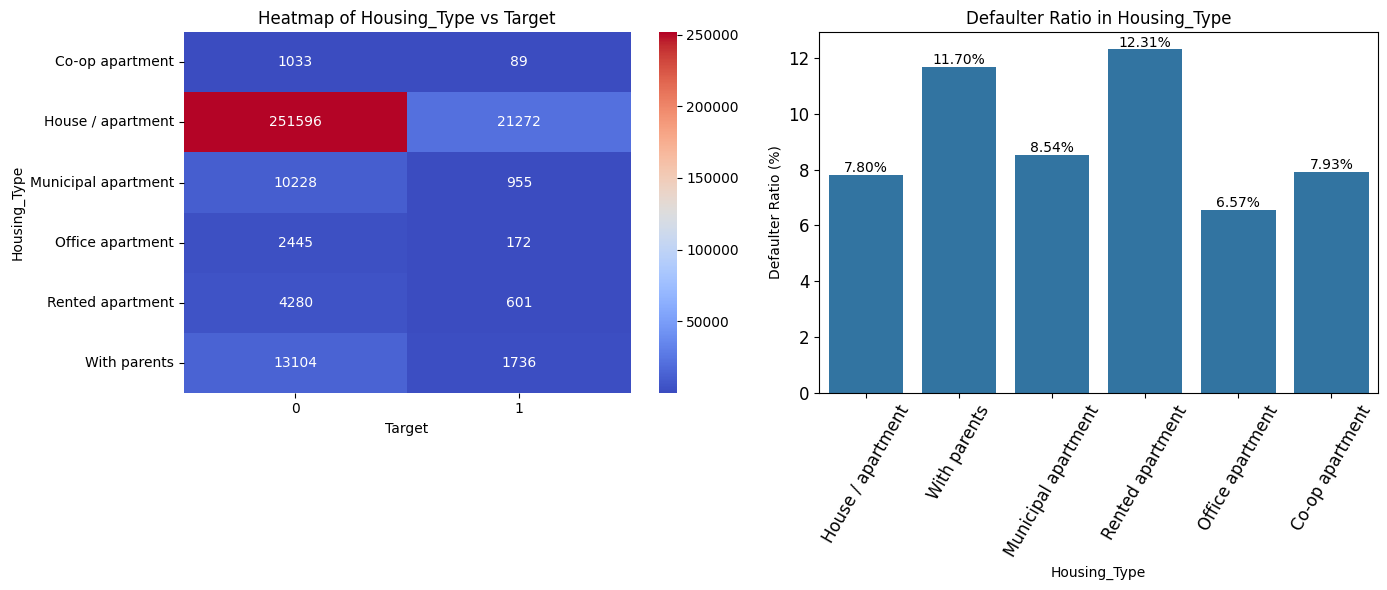

          Housing_Type  Defaulter_Ratio
0    House / apartment         7.795711
1         With parents        11.698113
2  Municipal apartment         8.539748
3     Rented apartment        12.313051
4     Office apartment         6.572411
5      Co-op apartment         7.932264


In [34]:
plot_and_print_category_analysis(df, 'Target','Housing_Type')

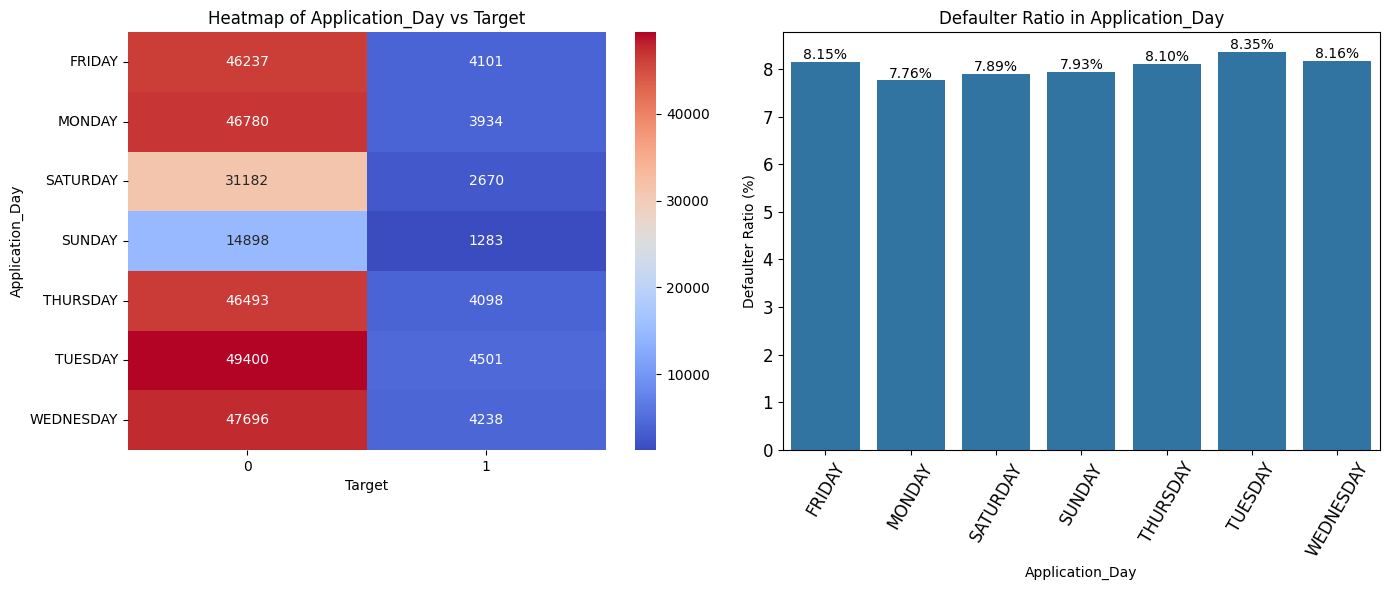

  Application_Day  Defaulter_Ratio
0          FRIDAY         8.146927
1          MONDAY         7.757227
2        SATURDAY         7.887274
3          SUNDAY         7.929053
4        THURSDAY         8.100255
5         TUESDAY         8.350494
6       WEDNESDAY         8.160357


In [35]:
plot_and_print_category_analysis(df, 'Target','Application_Day')

In [36]:
# showing the relationship between a numerical column and the target column
def plot_and_calculate_ratios(df, target_column, numerical_column, num_bins, bin_labels=None):
    # Creating bins using pd.cut with custom labels
    bins = pd.cut(df[numerical_column], bins=num_bins, labels=bin_labels)

    # Calculating default ratios
    bin_counts = df.groupby(bins)[target_column].count()
    bin_ratios = df.groupby(bins)[target_column].mean() * 100

    # Creating histogram
    fig, ax = plt.subplots(figsize=(10, 6))
    bin_counts.plot(kind='bar', color='orange', edgecolor='black', ax=ax)
    plt.title(f'{numerical_column} by {target_column}', fontsize=20)
    plt.xlabel(numerical_column)
    plt.ylabel('Default Ratio (%)')
    plt.xticks(rotation=45, ha='right')

    # Displaying bars with default ratios
    for idx, rect in enumerate(ax.patches):
        height = rect.get_height()
        ratio = bin_ratios.iloc[idx]
        ax.annotate(f'{ratio:.2f}%', (rect.get_x() + rect.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.show()

    # Print the ratios
    print("Default Ratios by Bins:")
    for bin_label, ratio in bin_ratios.items():
        print(f"{bin_label}: {ratio:.2f}%")

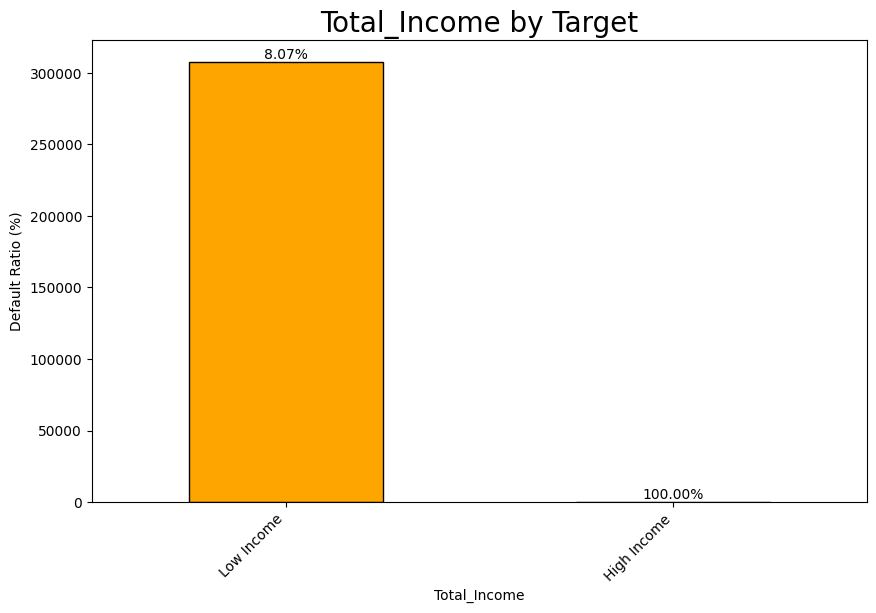

Default Ratios by Bins:
Low Income: 8.07%
High Income: 100.00%


In [37]:
plot_and_calculate_ratios(df, 'Target', 'Total_Income', num_bins=2, bin_labels=['Low Income','High Income'])

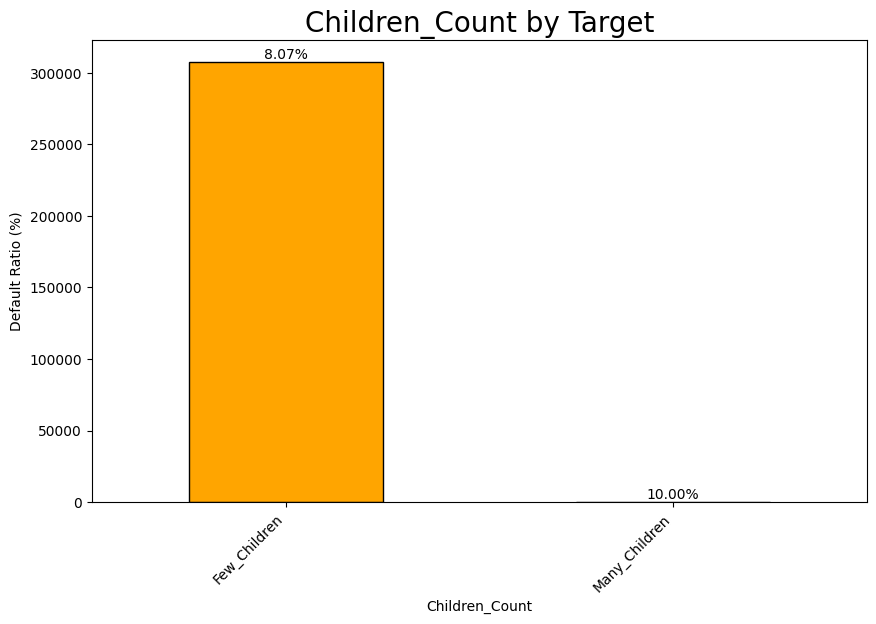

Default Ratios by Bins:
Few_Children: 8.07%
Many_Children: 10.00%


In [38]:
plot_and_calculate_ratios(df, 'Target', 'Children_Count', num_bins=2, bin_labels=['Few_Children','Many_Children'])

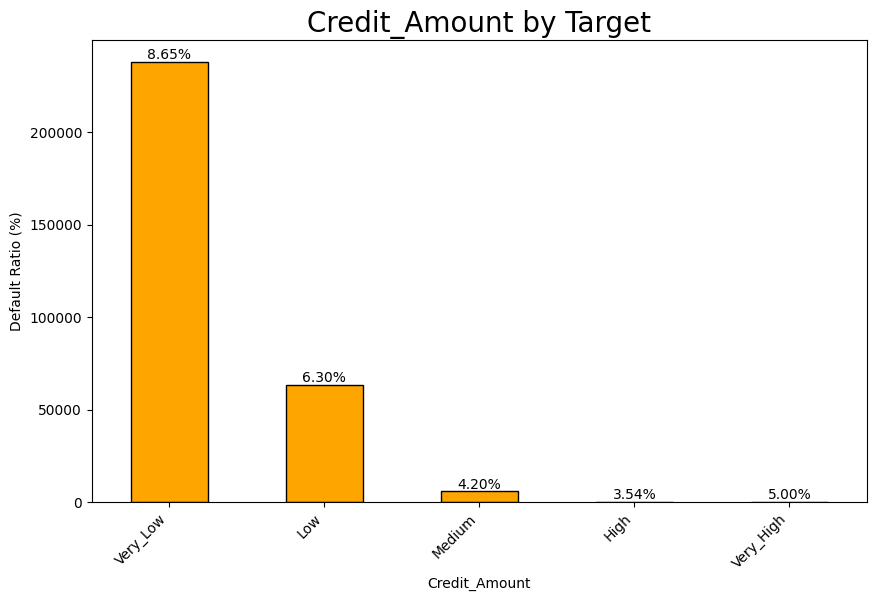

Default Ratios by Bins:
Very_Low: 8.65%
Low: 6.30%
Medium: 4.20%
High: 3.54%
Very_High: 5.00%


In [39]:
plot_and_calculate_ratios(df, 'Target', 'Credit_Amount', num_bins=5, bin_labels=['Very_Low','Low','Medium','High','Very_High'])

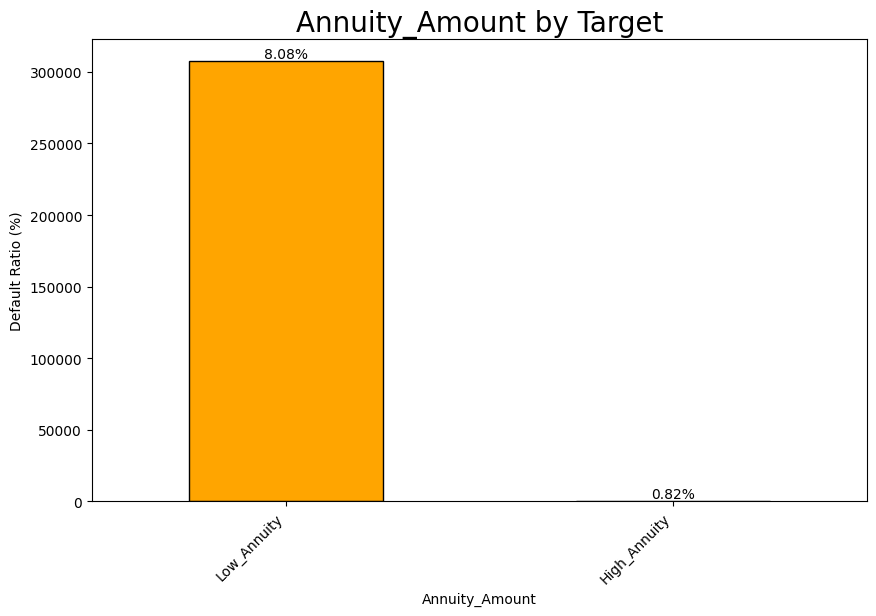

Default Ratios by Bins:
Low_Annuity: 8.08%
High_Annuity: 0.82%


In [40]:
plot_and_calculate_ratios(df, 'Target', 'Annuity_Amount', num_bins=2, bin_labels=['Low_Annuity','High_Annuity'])

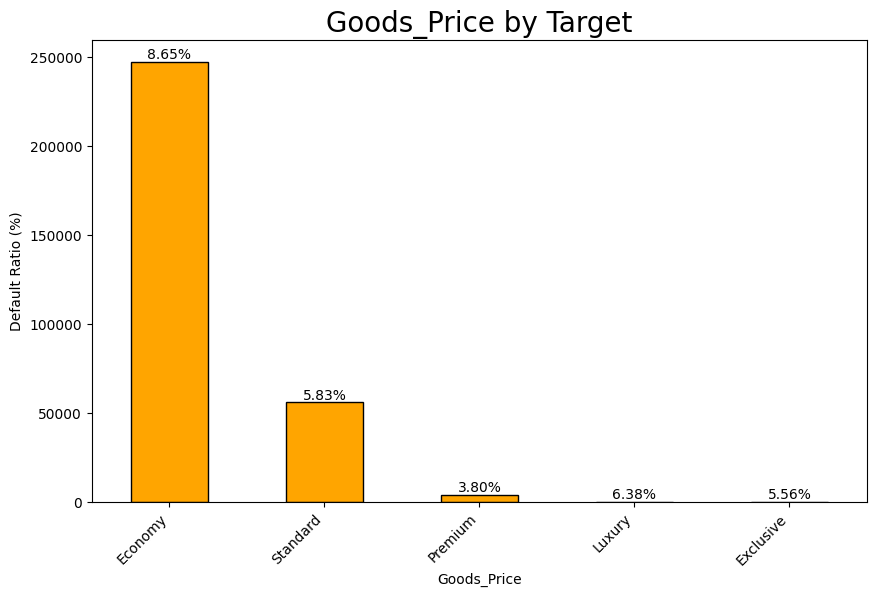

Default Ratios by Bins:
Economy: 8.65%
Standard: 5.83%
Premium: 3.80%
Luxury: 6.38%
Exclusive: 5.56%


In [41]:
plot_and_calculate_ratios(df, 'Target', 'Goods_Price', num_bins=5, bin_labels=['Economy','Standard','Premium','Luxury','Exclusive'])

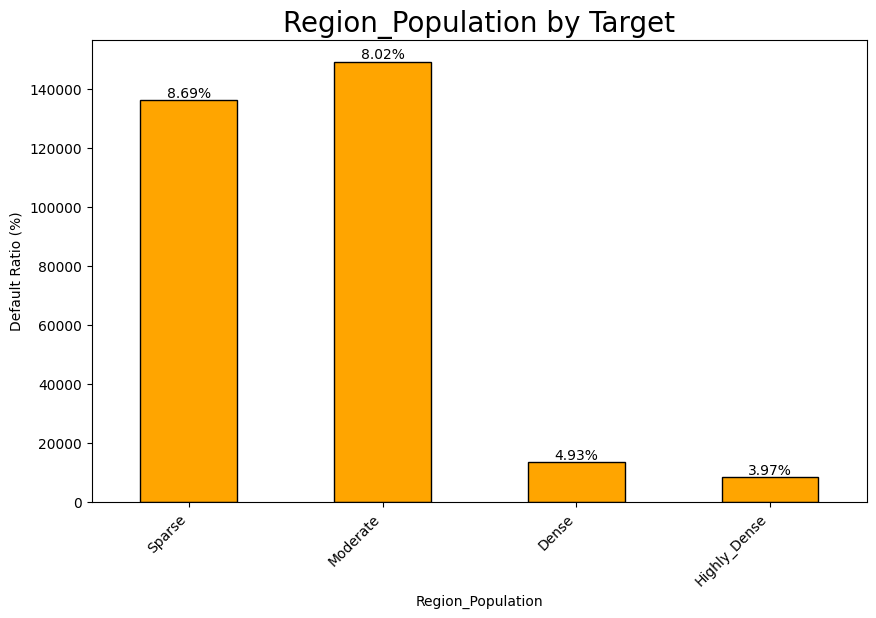

Default Ratios by Bins:
Sparse: 8.69%
Moderate: 8.02%
Dense: 4.93%
Highly_Dense: 3.97%


In [42]:
plot_and_calculate_ratios(df, 'Target', 'Region_Population', num_bins=4, bin_labels=['Sparse','Moderate','Dense','Highly_Dense'])

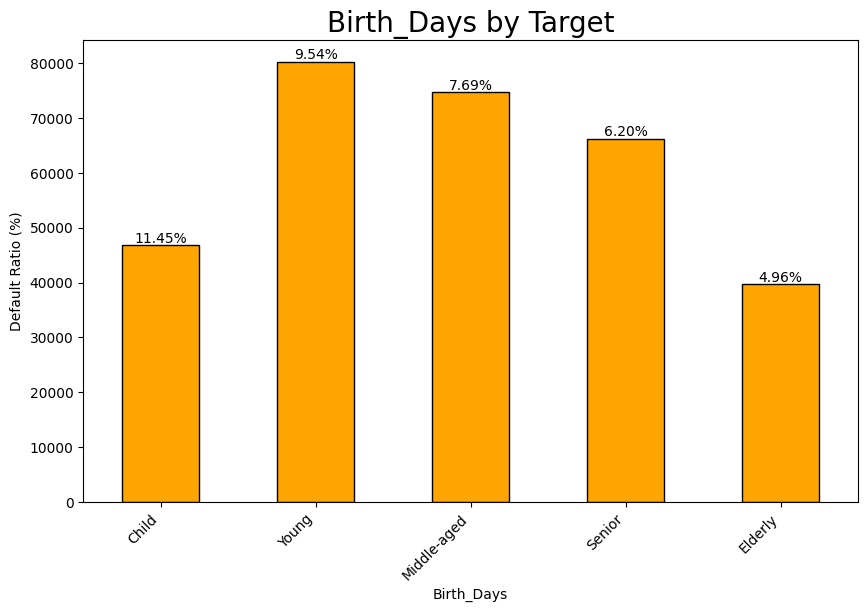

Default Ratios by Bins:
Child: 11.45%
Young: 9.54%
Middle-aged: 7.69%
Senior: 6.20%
Elderly: 4.96%


In [43]:
plot_and_calculate_ratios(df, 'Target', 'Birth_Days', num_bins=5, bin_labels=['Child','Young','Middle-aged','Senior','Elderly'])

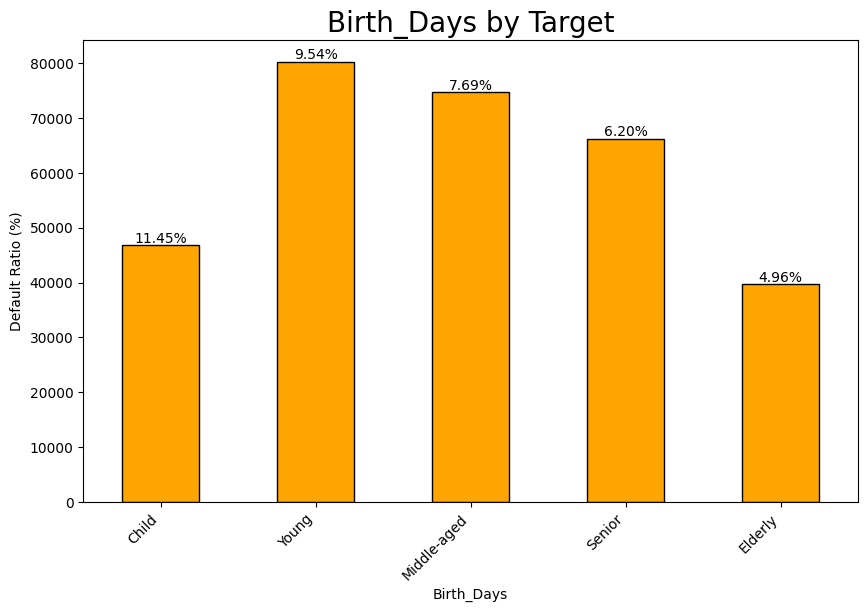

Default Ratios by Bins:
Child: 11.45%
Young: 9.54%
Middle-aged: 7.69%
Senior: 6.20%
Elderly: 4.96%


In [44]:
plot_and_calculate_ratios(df, 'Target', 'Birth_Days', num_bins=5, bin_labels=['Child','Young','Middle-aged','Senior','Elderly'])

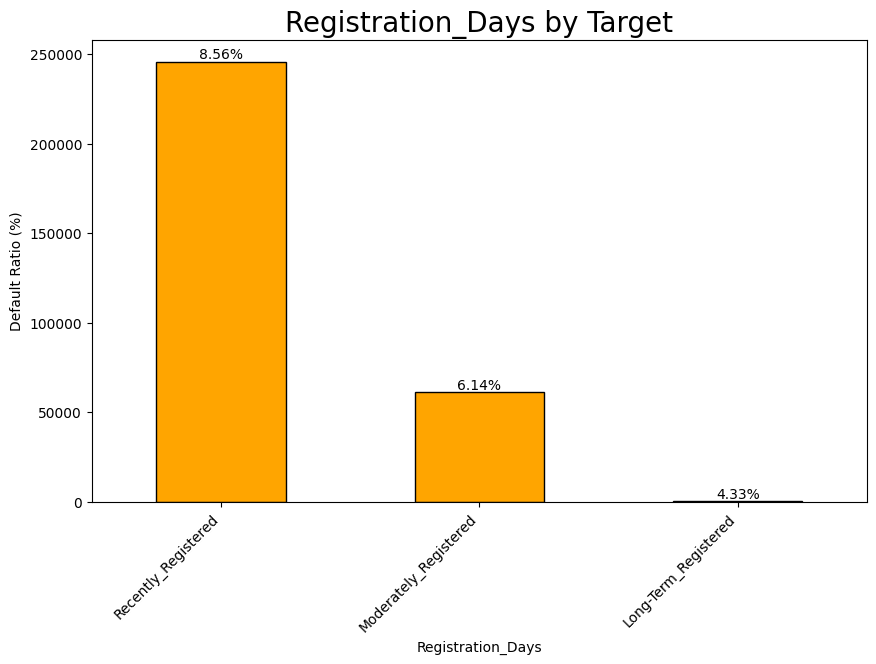

Default Ratios by Bins:
Recently_Registered: 8.56%
Moderately_Registered: 6.14%
Long-Term_Registered: 4.33%


In [45]:
plot_and_calculate_ratios(df, 'Target', 'Registration_Days', num_bins=3, bin_labels=['Recently_Registered','Moderately_Registered','Long-Term_Registered'])

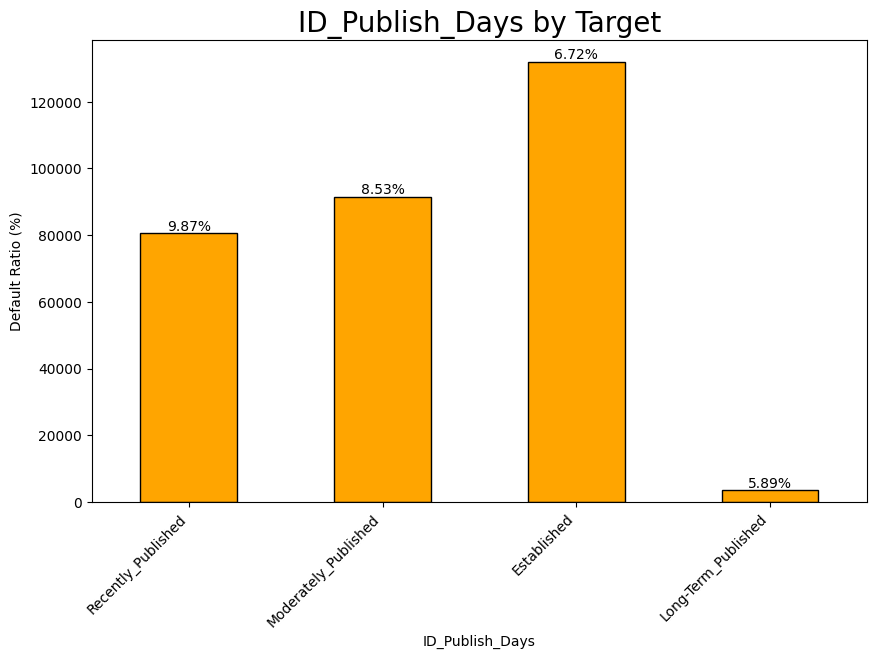

Default Ratios by Bins:
Recently_Published: 9.87%
Moderately_Published: 8.53%
Established: 6.72%
Long-Term_Published: 5.89%


In [46]:
plot_and_calculate_ratios(df, 'Target', 'ID_Publish_Days', num_bins=4, bin_labels=['Recently_Published','Moderately_Published','Established','Long-Term_Published'])

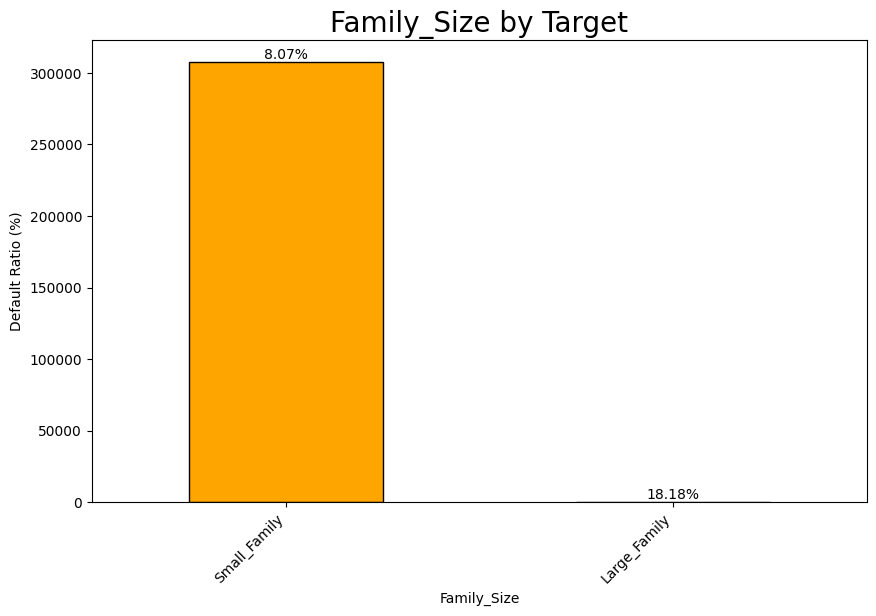

Default Ratios by Bins:
Small_Family: 8.07%
Large_Family: 18.18%


In [47]:
plot_and_calculate_ratios(df, 'Target', 'Family_Size', num_bins=2, bin_labels=['Small_Family','Large_Family'])

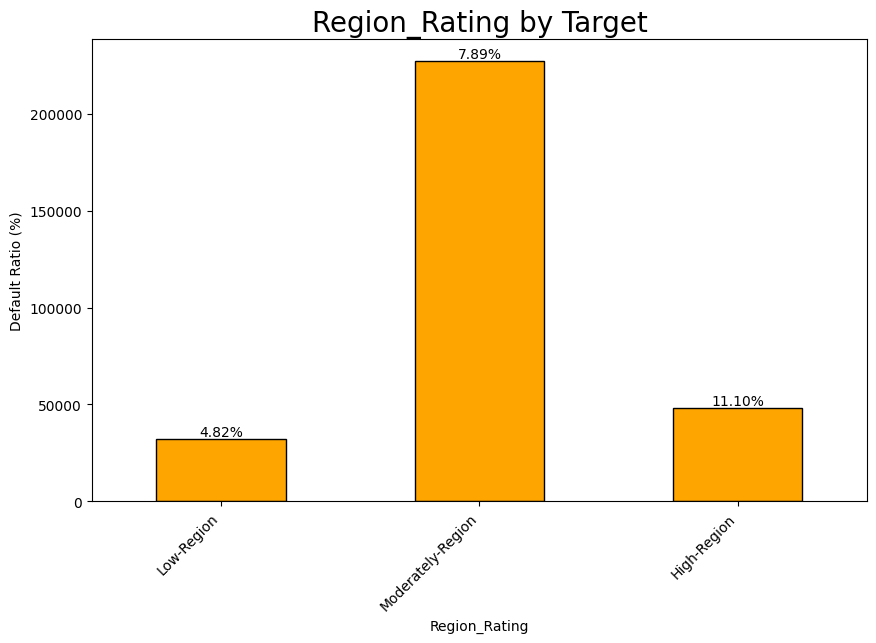

Default Ratios by Bins:
Low-Region: 4.82%
Moderately-Region: 7.89%
High-Region: 11.10%


In [48]:
plot_and_calculate_ratios(df, 'Target', 'Region_Rating', num_bins=3, bin_labels=['Low-Region','Moderately-Region','High-Region'])

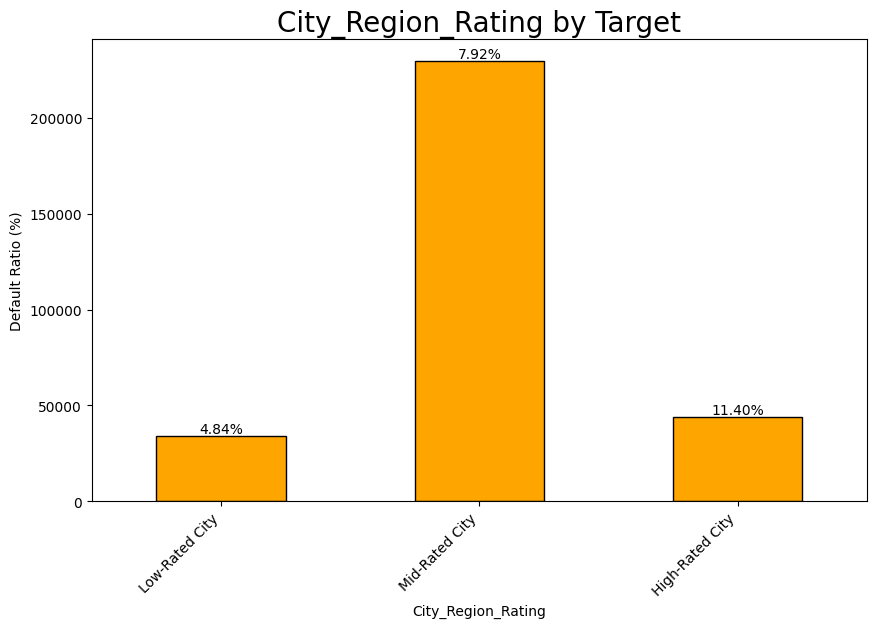

Default Ratios by Bins:
Low-Rated City: 4.84%
Mid-Rated City: 7.92%
High-Rated City: 11.40%


In [49]:
plot_and_calculate_ratios(df, 'Target', 'City_Region_Rating', num_bins=3, bin_labels=['Low-Rated City','Mid-Rated City','High-Rated City'])

## Feature Engineering

In [50]:
# Scaling numerical columns
from sklearn.preprocessing import MinMaxScaler

# Initializing the scaler with the desired feature range
scaler = MinMaxScaler(feature_range=(1, 5))
numerical_columns = df.select_dtypes(include=['number']).columns

for col in numerical_columns:
    if set(df[col].unique()) == {0, 1}:
        continue

    # Reshaped the data to a 2D array
    col_data = df[col].values.reshape(-1, 1)

    # Fiting the scaler on the column data
    scaler.fit(col_data)

    # Transformed the column data
    df[col] = scaler.transform(col_data)

In [51]:
# Performing label encoding
from sklearn.preprocessing import LabelEncoder
ordinal_columns = df.select_dtypes("O").columns
numerical_columns = df.select_dtypes(np.number).columns
encoder = LabelEncoder()

# Fiting and transforming the training data
for col in ordinal_columns:
    df[col] = encoder.fit_transform(df[col])


In [52]:
X = df.drop("Target",axis=1)
y = df['Target']

Text(0.5, 1.0, 'Distribution of Target column before balancing')

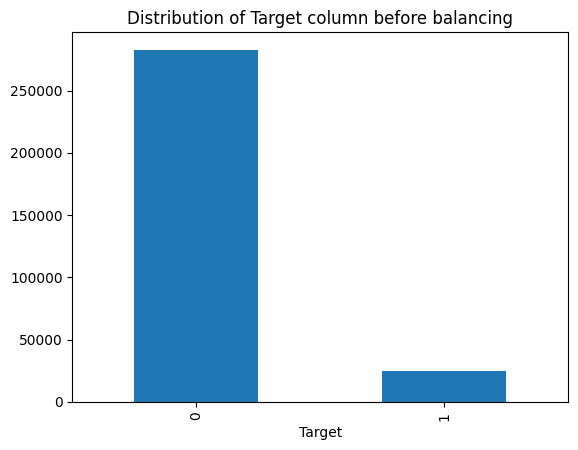

In [53]:
df["Target"].value_counts().plot(kind="bar")
plt.title("Distribution of Target column before balancing")

In [54]:
# Applying SMOTE to handle imbalanced data
from collections import Counter
from imblearn.over_sampling import SMOTE

sampler = SMOTE()
X_new, y_new = sampler.fit_resample(X, y)

# Ensuring balanced data
print("Class distribution after SMOTE:", Counter(y_new))

Class distribution after SMOTE: Counter({1: 282686, 0: 282686})


Text(0.5, 1.0, 'Distribution of Target column After balancing')

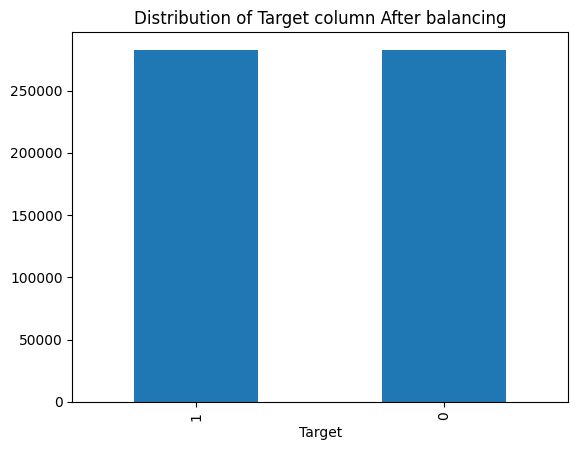

In [55]:
y_new.value_counts().plot(kind="bar")
plt.title("Distribution of Target column After balancing")

In [56]:
df.head()

,Target,Contract_Type,Owns_Car,Owns_Realty,Children_Count,Total_Income,Credit_Amount,Annuity_Amount,Goods_Price,Companion_Type,Income_Type,Education_Level,Family_Status,Housing_Type,Region_Population,Birth_Days,Employed_Days,Registration_Days,ID_Publish_Days,Mobile_Flag,Work_Phone_Flag,Home_Phone_Flag,Mobile_Contact_Flag,Phone_Flag,Email_Flag,Job_Type,Family_Size,Region_Rating,City_Region_Rating,Application_Day,Application_Hour,Reg_Region_Not_Live_Region,Reg_Region_Not_Work_Region,Live_Region_Not_Work_Region,Reg_City_Not_Live_City,Reg_City_Not_Work_City,Live_City_Not_Work_City,Organization_Type,External_Source_2,External_Source_3,Social_30_Observations,Social_30_Defaults,Social_60_Observations,Social_60_Defaults,Last_Phone_Change_Days,Document_Flag_2,Document_Flag_3,Document_Flag_4,Document_Flag_5,Document_Flag_6,Document_Flag_7,Document_Flag_8,Document_Flag_9,Document_Flag_10,Document_Flag_11,Document_Flag_12,Document_Flag_13,Document_Flag_14,Document_Flag_15,Document_Flag_16,Document_Flag_17,Document_Flag_18,Document_Flag_19,Document_Flag_20,Document_Flag_21,Credit_Inquiries_Hour,Credit_Inquiries_Day,Credit_Inquiries_Week,Credit_Inquiries_Month,Credit_Inquiries_Quarter,Credit_Inquiries_Year
0,1,0,0,1,1.0,1.006047,1.361146,1.360126,1.309764,6,7,4,3,1,2.025285,1.444645,1.006976,1.591440,2.178269,1,1,0,1,1,0,8,1.000000,3.0,3.0,6,2.739130,0,0,0,0,0,0,5,2.230169,1.620218,1.022989,1.235294,1.023256,1.333333,2.056850,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.160000
1,0,0,0,0,1.0,1.008356,2.246944,1.531695,2.086420,1,4,1,1,1,1.180066,3.091545,1.013011,1.192283,1.161734,1,1,0,1,1,0,3,1.210526,1.0,1.0,1,2.913043,0,0,0,0,0,0,39,3.911092,3.279557,1.011494,1.000000,1.011628,1.000000,1.771668,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,0,1,1,1,1.0,1.001431,1.089888,1.080098,1.094276,6,7,4,3,1,1.539588,3.605862,1.002464,1.690661,2.406697,1,1,1,1,1,0,8,1.000000,3.0,3.0,1,2.565217,0,0,0,0,0,0,11,3.600759,4.256522,1.000000,1.000000,1.000000,1.000000,1.759553,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,0,0,0,1,1.0,1.003739,1.267348,1.437908,1.255892,6,7,4,0,1,1.428093,3.596618,1.033282,2.594196,2.354453,1,1,0,1,0,0,8,1.210526,3.0,3.0,6,3.956522,0,0,0,0,0,0,5,4.043003,3.279557,1.022989,1.000000,1.023256,1.000000,1.575023,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.006402,1.003111,1.017181,1.039614,1.004069,1.303996
4,0,0,0,1,1.0,1.003278,1.467416,1.315900,1.471380,6,7,4,3,1,2.571520,3.805637,1.033271,1.698930,2.921912,1,1,0,1,0,0,3,1.000000,3.0,3.0,4,2.913043,0,0,0,0,1,1,37,2.509887,3.279557,1.000000,1.000000,1.000000,1.000000,2.030755,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
# Applying select k best method to select important featues
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=20)
new = selector.fit_transform(X_new, y_new)
selected_columns = X_new.columns[selector.get_support(indices=True)]
print("Selected columns:", selected_columns)

Selected columns: Index(['Contract_Type', 'Owns_Car', 'Owns_Realty', 'Goods_Price',
       'Education_Level', 'Family_Status', 'Birth_Days', 'Employed_Days',
       'Registration_Days', 'Home_Phone_Flag', 'Phone_Flag', 'Email_Flag',
       'Region_Rating', 'City_Region_Rating', 'Reg_Region_Not_Work_Region',
       'Live_Region_Not_Work_Region', 'External_Source_2', 'External_Source_3',
       'Last_Phone_Change_Days', 'Document_Flag_8'],
      dtype='object')


## Train_Test_split

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_new, y_new,test_size=0.1)

## Modeling

In [59]:
# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [60]:
# Storing functions of models in variable
models = [
    RandomForestClassifier(),
    MLPClassifier(),
    KNeighborsClassifier(),
    LogisticRegression()
]

In [61]:
# Importing Evaluation matrces
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score